#Import Modules

In [1]:
#0 code flow

#A historical data collection
#1 check if sql directory and store exists
#2 if 1 is true, check if any part of date range of required data exists
#3 if 2 is true, extract data and extrapolate missing data
#4 if 2 not true, get whole historical data from internet
#5 perform operations on df from internet
#6 add new info to sql store

#B websocket live data collection
#1 get missing latest data date range
#2 extract data live  from websocket
#3 perform operations on df from internet
#4 add new info to sql store


In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline 
 
import sys
import datetime
from dateutil.relativedelta import relativedelta
from importlib import reload

import mplfinance as mpf
import matplotlib.pyplot as plt

sys.path.insert(1, './logic')  
import helperfunctions as hlpf
reload(hlpf)

<module 'helperfunctions' from 'c:\\Users\\ROSEMARY\\Desktop\\akt.files\\programming.projects\\git.projects\\qflTradeBot\\./logic\\helperfunctions.py'>

In [3]:
#get dictionary of all symbol pairs from website
allsymbolassets_dct = hlpf.get_allsymbolassets_dct()
symbol_pairs_lst = allsymbolassets_dct.get("symbol")
base_asset_lst   = allsymbolassets_dct.get("baseAsset")
quote_asset_lst  = allsymbolassets_dct.get("quoteAsset")
unique_asset_lst = hlpf.get_unique_tickers_lst(base_asset_lst, quote_asset_lst)
base_quote_lst_hyphen = list(map((lambda x,y: x + "-" + y ), base_asset_lst,quote_asset_lst))
base_quote_lst_nohyph = list(map((lambda x,y: x + y ), base_asset_lst,quote_asset_lst))

#get list of all to play against
all_basequote_lst = []
all_basequote_lst.extend(base_quote_lst_hyphen)
all_basequote_lst.extend(base_quote_lst_nohyph)



In [4]:
#get symbol pairs to work on from file
lines = []
symbolfile = "./inputs/symbols_inputlst.txt"
print(f'symbol pairs will be loaded from\n',symbolfile)
chk_file, illegal_symbpairs_lst, symbol_lst = hlpf.chk_symbolpair_file(symbolfile, all_basequote_lst)


symbol pairs will be loaded from
 ./inputs/symbols_inputlst.txt
nos of symbols from file is 2
Success!!!!, all symbol pair items from file exist on binance list of symbol pairs
list of symbols to be processed
['ATOM-USDT', 'KMD-USDT']


In [5]:
#get interval type to use
approved_data_interval_lst = ["1m", "3m", "5m", "15m", "30m", "1h", "2h", "4h", "6h", "8h", "12h", "1d", "3d", "1w", "1mo"]
#default_data_interval_lst = ["5m", "1h", "1d"]
default_data_interval_lst = ["1h", "1d"]


approved_data_kline_lst = ["klines", "AggTrades", "Trades"]
default_data_kline_type = ("klines") 

In [6]:
#get dates to use
#default value of dates is 3 months prior to today till today
today_date_input = datetime.date.today()
end_date_dt = today_date_input

start_months_val = 3
months_val = start_months_val * -1
start_date_dt  = hlpf.get_date_from_months(end_date_dt,  months_val)
print(f'difference in months btw start date&end date: {start_months_val}')
print(f'start date: {start_date_dt}')
print(f'end date: {end_date_dt}')

difference in months btw start date&end date: 3
start date: 2021-12-14
end date: 2022-03-14


In [7]:
#print out of all input data to use
print("=" * 75)
print(f'print out of all input data to use')
print("=" * 75)
print(f'symbol_lst:                 {symbol_lst}')
print(f'start_date_dt:              {start_date_dt}')
print(f'end_date_dt:                {end_date_dt}')
print(f'default_data_interval_lst:  {default_data_interval_lst}')
print(f'default_data_kline_type:    {default_data_kline_type}')

print out of all input data to use
symbol_lst:                 ['ATOM-USDT', 'KMD-USDT']
start_date_dt:              2021-12-14
end_date_dt:                2022-03-14
default_data_interval_lst:  ['1h', '1d']
default_data_kline_type:    klines


In [8]:
#required input data
#symbol_lst
#start_date_dt
#end_date_dt
#default_data_interval_type
#default_data_kline_type
kline_input_dct = hlpf.get_kline_dict(symbol_lst, start_date_dt, end_date_dt, default_data_interval_lst, default_data_kline_type)


In [9]:
#check for kline dict data
status = kline_input_dct.get("status")
if status == "success":
    print("=" * 75)
    print(f"status:stage 01ofXX: input data for df dict extraction successful")
    print("=" * 75)
    print(kline_input_dct)

status:stage 01ofXX: input data for df dict extraction successful
{'status': 'success', 'startdate': '2021-12-14', 'enddate': '2022-03-13', 'yearmnths_rnge': ['2021-12', '2022-01', '2022-02'], 'days_rnge': ['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13'], 'klines': 'klines', 'symbols_lst': ['ATOM-USDT', 'KMD-USDT'], 'interval_lst': ['1h', '1d'], 'datepart_filename': '20211214-20220313'}


In [10]:
#can this section be done with threads asyncronously????
#persistency needs to be added to this function!!!!!!!!
#need to get the data date parts missing-last day may be missing
df_dct = hlpf.get_kline_data(kline_input_dct)
status = df_dct.get("status")
if status == "success":
    print("=" * 75)
    print(f"status:stage 02ofXX: raw ochlv df data successfully extracted")
    print("=" * 75)

response code: 200|https://data.binance.vision/data/spot/monthly/klines/ATOMUSDT/1h/ATOMUSDT-1h-2021-12.zip downloaded successfully
response code: 200|https://data.binance.vision/data/spot/monthly/klines/ATOMUSDT/1h/ATOMUSDT-1h-2022-01.zip downloaded successfully
response code: 200|https://data.binance.vision/data/spot/monthly/klines/ATOMUSDT/1h/ATOMUSDT-1h-2022-02.zip downloaded successfully
response code: 200|https://data.binance.vision/data/spot/daily/klines/ATOMUSDT/1h/ATOMUSDT-1h-2022-03-01.zip downloaded successfully
response code: 200|https://data.binance.vision/data/spot/daily/klines/ATOMUSDT/1h/ATOMUSDT-1h-2022-03-02.zip downloaded successfully
response code: 200|https://data.binance.vision/data/spot/daily/klines/ATOMUSDT/1h/ATOMUSDT-1h-2022-03-03.zip downloaded successfully
response code: 200|https://data.binance.vision/data/spot/daily/klines/ATOMUSDT/1h/ATOMUSDT-1h-2022-03-04.zip downloaded successfully
response code: 200|https://data.binance.vision/data/spot/daily/klines/AT

In [11]:
#unpack df_dct for use
symbols_lst = df_dct.get("symbols") 
intrvl_lst = df_dct.get("interval_lst")
df_lst = df_dct.get("df_lst")
df_ochlv_lst = df_dct.get("df_ochlv_lst")
all_lst = list(zip(symbols_lst, intrvl_lst, df_lst, df_ochlv_lst ))

In [12]:
# quick check of data unpacked
print(f'nos of symbolpairs: {len(symbols_lst)}')
print(f'nos of intervals: {len(intrvl_lst)}')
print(f"nos of full df's: {len(df_lst)}")
print(f"nos of ochlv df's: {len(df_ochlv_lst)}")

print(f'list of symbolpairs: {symbols_lst}')
print(f'list of intervals: {intrvl_lst}')

for cnt, (symbol, intrvl, df_full, df_ochlv) in enumerate(all_lst):
    print(f'count: {cnt}|symbol: {symbol}|interval:{intrvl}|rows orig df:{len(df_full.index)}|rows ochlv df:{len(df_ochlv.index)}')


nos of symbolpairs: 4
nos of intervals: 4
nos of full df's: 4
nos of ochlv df's: 4
list of symbolpairs: ['ATOMUSDT', 'ATOMUSDT', 'KMDUSDT', 'KMDUSDT']
list of intervals: ['1h', '1d', '1h', '1d']
count: 0|symbol: ATOMUSDT|interval:1h|rows orig df:2472|rows ochlv df:2472
count: 1|symbol: ATOMUSDT|interval:1d|rows orig df:103|rows ochlv df:103
count: 2|symbol: KMDUSDT|interval:1h|rows orig df:2472|rows ochlv df:2472
count: 3|symbol: KMDUSDT|interval:1d|rows orig df:103|rows ochlv df:103


In [13]:
# df analysis and new column additions for the ochlv df

In [14]:
#i need to dynamically access this dates data to transform the plot!!!!!
#this needs to be done differently for every type of interval
date_from_lst = []
date_to_lst = []
datapts_btw_start_end = 200
datapts_shift = 0 #this usually same as datapts_btw_start_end
datapts_shift_factor = 1 #can be a 1,2,3,4 etc
for interval in intrvl_lst:
    date_ = hlpf.get_sliced_startdate_dt(datapts_btw_start_end, datapts_shift, datapts_shift_factor, interval, end_date_dt)
    
    date_from = date_[0]
    date_to = date_[1]
    
    date_from_lst.append(date_from)
    date_to_lst.append(date_to)


In [15]:

df_full_slicedate_lst = []
df_ochlv_slicedate_lst = []
all_lst = list(zip(symbols_lst, intrvl_lst, date_from_lst, date_to_lst, df_lst, df_ochlv_lst ))
for cnt, (symbol, intrvl, date_from, date_to, df_full, df_ochlv) in enumerate(all_lst):
    df_full_slicedate = hlpf.get_historical_data(df_full, str(date_from), str(date_to))
    df_ochlv_slicedate = hlpf.get_historical_data(df_ochlv, str(date_from), str(date_to))
    
    df_full_slicedate_lst.append(df_full_slicedate)
    df_ochlv_slicedate_lst.append(df_ochlv_slicedate)

#quick check of df dates

slicedate_lst = list(zip(symbols_lst, intrvl_lst, df_full_slicedate_lst, df_ochlv_slicedate_lst, df_lst, df_ochlv_lst))   
for cnt, (symbol, intrvl, df_full_slicedate, df_ochlv_slicedate, df_full, df_ochlv) in enumerate(slicedate_lst):
    print(f'count: {cnt}|symbol: {symbol}|interval: {intrvl}|rows orig df sliced by date:{len(df_full_slicedate.index)} of {len(df_full.index)}|rows ochlv df sliced by date:{len(df_ochlv_slicedate.index)} of {len(df_ochlv.index)}')       



count: 0|symbol: ATOMUSDT|interval: 1h|rows orig df sliced by date:200 of 2472|rows ochlv df sliced by date:200 of 2472
count: 1|symbol: ATOMUSDT|interval: 1d|rows orig df sliced by date:103 of 103|rows ochlv df sliced by date:103 of 103
count: 2|symbol: KMDUSDT|interval: 1h|rows orig df sliced by date:200 of 2472|rows ochlv df sliced by date:200 of 2472
count: 3|symbol: KMDUSDT|interval: 1d|rows orig df sliced by date:103 of 103|rows ochlv df sliced by date:103 of 103


In [16]:
#settings for the matplotlib  plot
show_nontrading_days = True
chart_styles = [
                'default', 'binance', 'blueskies', 'brasil', 
                'charles', 'checkers', 'classic', 'yahoo',
                'mike', 'nightclouds', 'sas', 'starsandstripes'
            ]
chart_style = chart_styles[1] #let this be selected from chart_styles instead

chart_types = ['candle', 'ohlc', 'line', 'renko', 'pnf']
chart_type = chart_types[0]


#indicator settings
#need to correct this properly
mav1 = 3 #st.number_input('Mav 1', min_value=3, max_value=30, value=3, step=1)
mav2 = 6 #st.number_input('Mav 2', min_value=3, max_value=30, value=6, step=1)
mav3 = 9 #st.number_input('Mav 3', min_value=3, max_value=30, value=9, step=1)
mavset=(int(mav1),int(mav2),int(mav3))


count: 0
symbol: ATOMUSDT|date_from: 2021-08-26|date_to: 2022-03-14|intrvl: 1h
chart_type: candle|show_nontrading_days: True|mavset: (3, 6, 9)|chart_style: binance
count: 1
symbol: ATOMUSDT|date_from: 2021-08-26|date_to: 2022-03-14|intrvl: 1d
chart_type: candle|show_nontrading_days: True|mavset: (3, 6, 9)|chart_style: binance
count: 2
symbol: KMDUSDT|date_from: 2021-08-26|date_to: 2022-03-14|intrvl: 1h
chart_type: candle|show_nontrading_days: True|mavset: (3, 6, 9)|chart_style: binance
count: 3
symbol: KMDUSDT|date_from: 2021-08-26|date_to: 2022-03-14|intrvl: 1d
chart_type: candle|show_nontrading_days: True|mavset: (3, 6, 9)|chart_style: binance


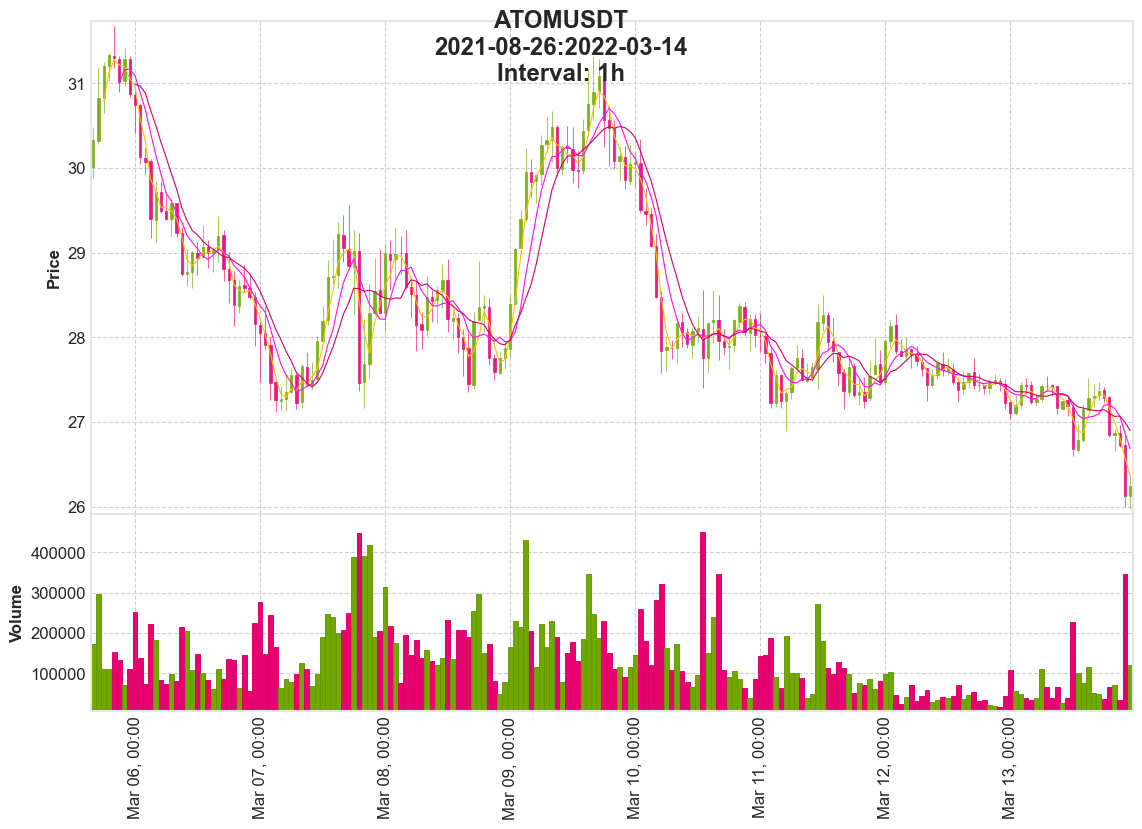

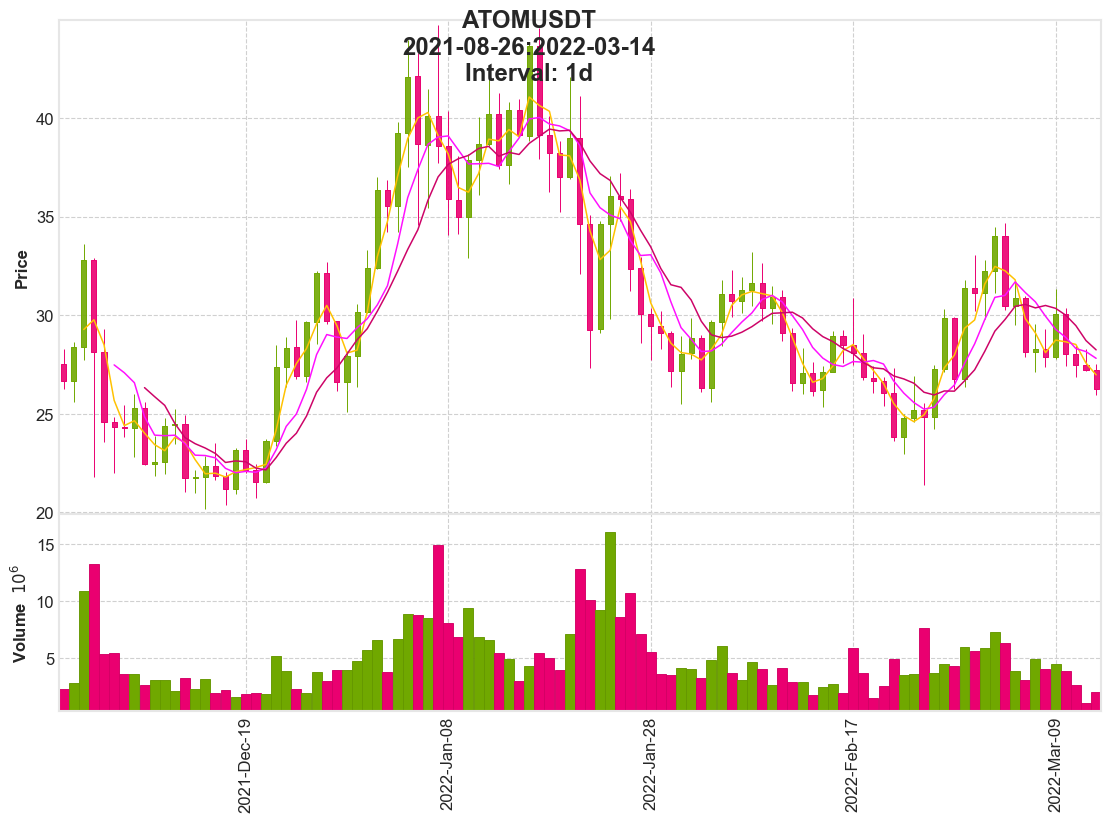

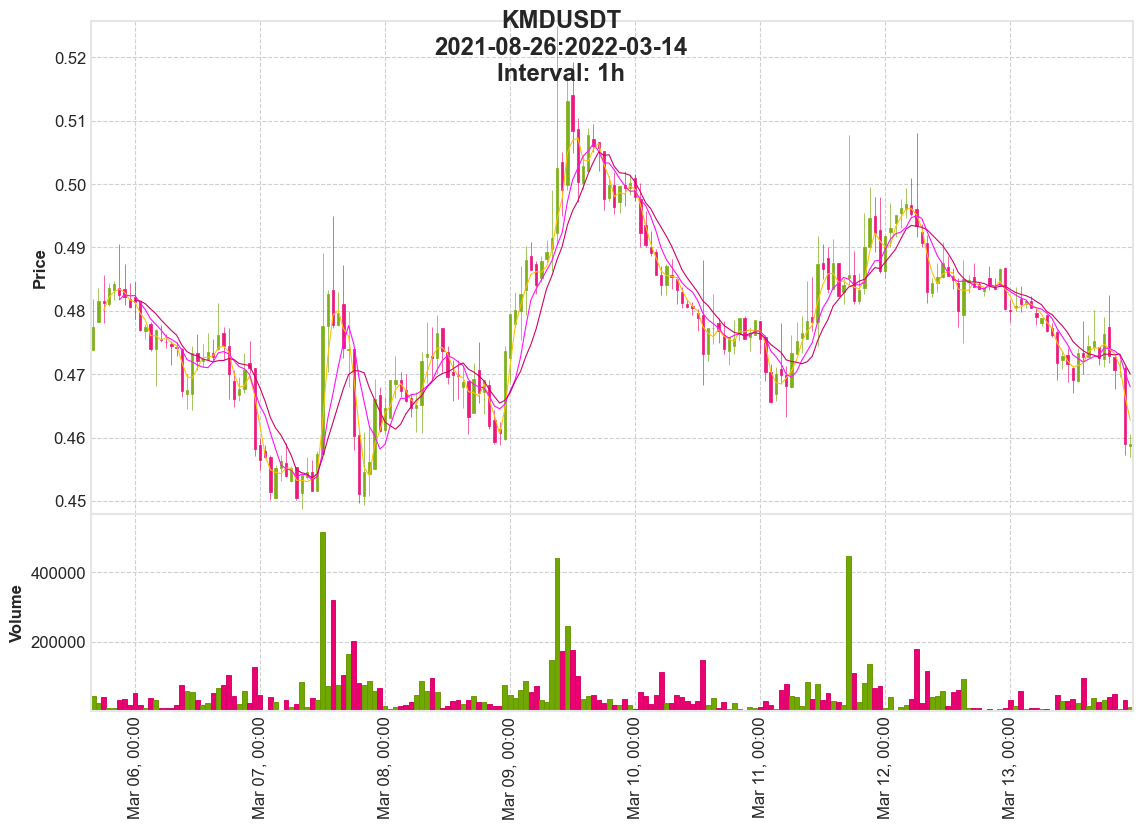

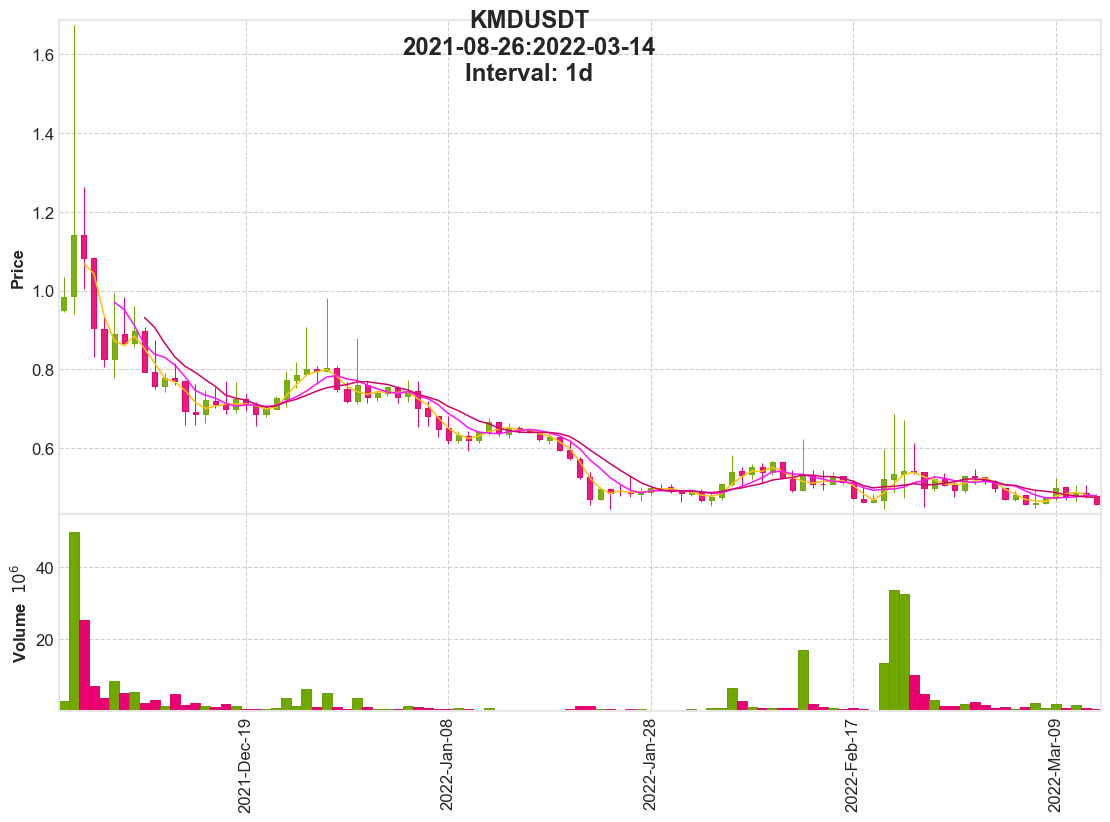

In [17]:
#list all data going into plot
for cnt, (symbol, intrvl, df_full_slicedate, df_ochlv_slicedate, df_full, df_ochlv) in enumerate(slicedate_lst): 
    print("=" * 50)
    print(f'count: {cnt}')
    print(f'symbol: {symbol}|date_from: {date_from}|date_to: {date_to}|intrvl: {intrvl}')
    print(f'chart_type: {chart_type}|show_nontrading_days: {show_nontrading_days}|mavset: {mavset}|chart_style: {chart_style}')
   
    hlpf.plotchart(df_ochlv_slicedate, symbol, date_from, date_to, intrvl, chart_type, show_nontrading_days, mavset, chart_style)